In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
df =  pd.read_csv("../dados/traffic.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      32 non-null     object
 1   Sessions  32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [3]:
df.head()

,Date,Sessions
0,5/15/2022,663
1,5/16/2022,1627
2,5/17/2022,1630
3,5/18/2022,1666
4,5/19/2022,1604


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# How Do We Determine an Outlier?

There are several ways that we can find outliers using statistical techniques, domain knowledge or algrorithms.

In [5]:
px.line(data_frame=df, x='Date',y='Sessions',title="Lets View Our Data for Outliers with the Naked Eye.")

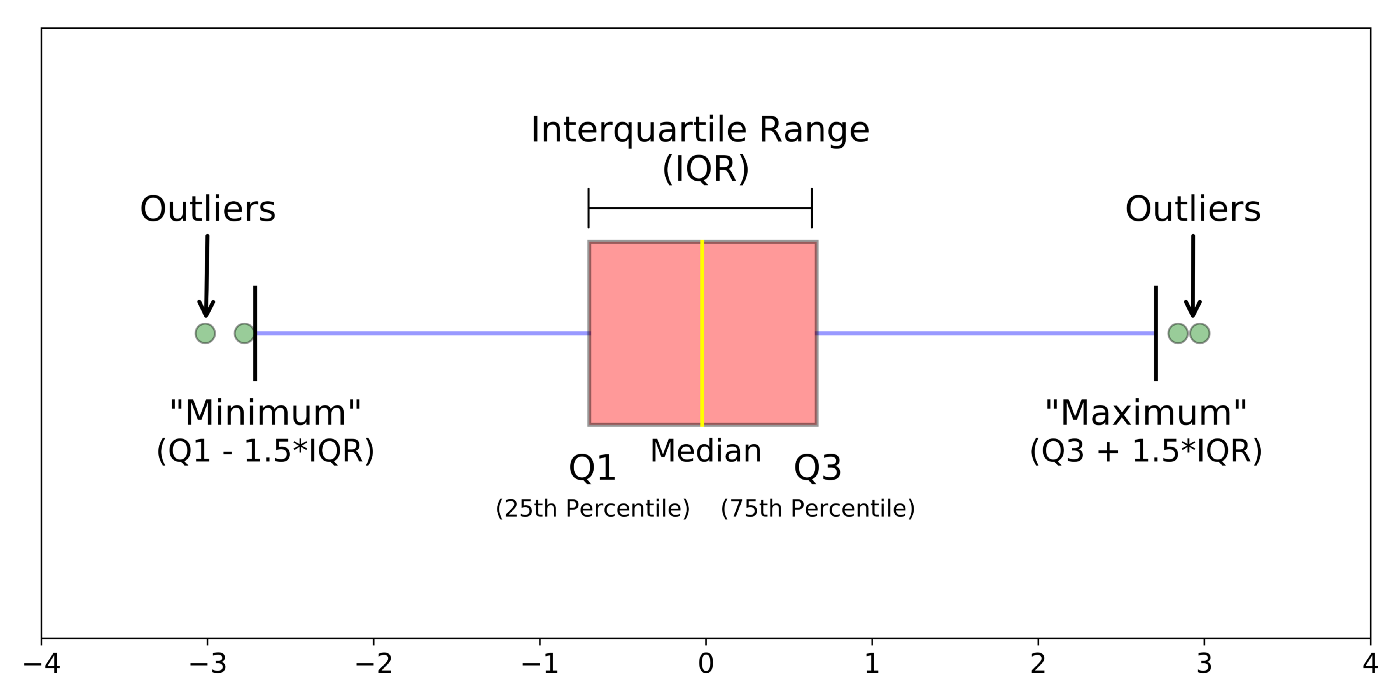

In [6]:
px.box(data_frame=df,x='Sessions')

In [7]:
px.violin(data_frame=df,x='Sessions')

# Using IQR to Estimate Outliers

In [8]:
def traditional_outlier(df,x):
    q1  =  df[x].quantile(.25)
    q3  =  df[x].quantile(.75)
    iqr = q3-q1
    df['Traditional']  = np.where(df[[x]]<(q1-1.5*iqr),-1,
                         np.where(df[[x]]>(q3+1.5*iqr),-1,1))
    return df

In [9]:
traditional_outlier(df,'Sessions')

,Date,Sessions,Traditional
0,2022-05-15,663,1
1,2022-05-16,1627,1
2,2022-05-17,1630,1
3,2022-05-18,1666,1
4,2022-05-19,1604,1
5,2022-05-20,1188,1
6,2022-05-21,435,1
7,2022-05-22,726,1
8,2022-05-23,1565,1
9,2022-05-24,1649,1


# Using Algortims to Estimate Outliers

### Isolation Forest

Isolation Forest using a tree based system to detect anomalys in the data. This is really good for large datasets. 

In [11]:
from sklearn.ensemble import IsolationForest

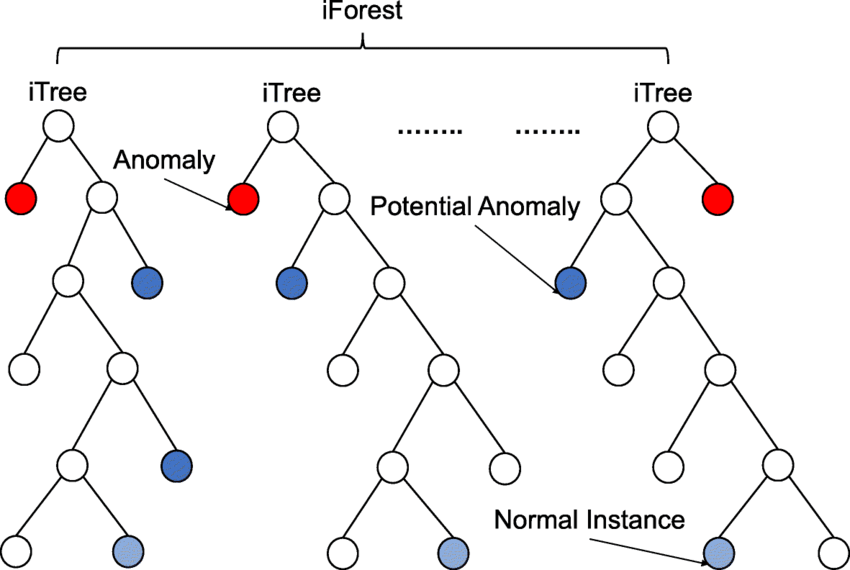

In [12]:
IsolationForest().fit(df[['Sessions']]).predict(df[['Sessions']])

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1])

In [13]:
df['Isolation Forest'] = IsolationForest().fit(df[['Sessions']]).predict(df[['Sessions']])

### Eliptic Envelope
An algorithm for detecting outliers in a Gaussian distributed dataset

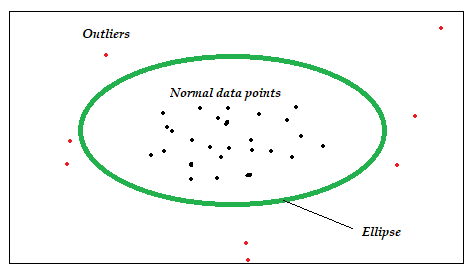

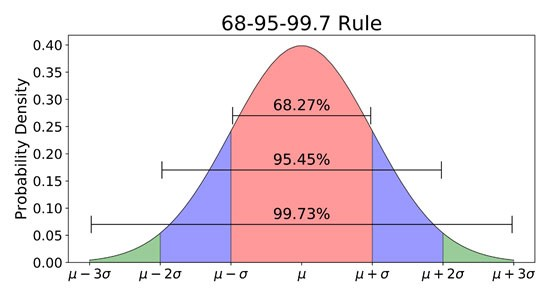

In [14]:
from sklearn.covariance import EllipticEnvelope
EllipticEnvelope().fit(df[['Sessions']]).predict(df[['Sessions']])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### Local Outlier Factor
It measures the local deviation of the density of a given sample with respect to its neighbors.

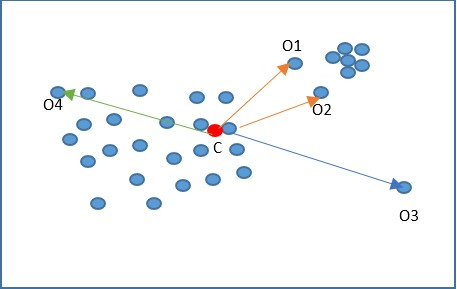

In [15]:
from sklearn.neighbors import LocalOutlierFactor
LocalOutlierFactor(n_neighbors=5, novelty=True).fit(df[['Sessions']]).predict(df[['Sessions']])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
def outliers_find(df,x):
    df['Local Outlier'] = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(df[[x]]).predict(df[[x]])
    df['Isolation Forest'] = IsolationForest().fit(df[[x]]).predict(df[[x]])
    df['Elliptical'] = EllipticEnvelope().fit(df[[x]]).predict(df[[x]])
    return df

In [17]:
outliers_find(df,'Sessions')

,Date,Sessions,Traditional,Isolation Forest,Local Outlier,Elliptical
0,2022-05-15,663,1,1,1,1
1,2022-05-16,1627,1,1,1,1
2,2022-05-17,1630,1,1,1,1
3,2022-05-18,1666,1,1,1,1
4,2022-05-19,1604,1,1,1,1
5,2022-05-20,1188,1,1,1,1
6,2022-05-21,435,1,-1,1,1
7,2022-05-22,726,1,1,1,1
8,2022-05-23,1565,1,1,1,1
9,2022-05-24,1649,1,1,1,1


In [18]:
def outliers_find(df,x):
    q1  =  df[x].quantile(.25)
    q3  =  df[x].quantile(.75)
    iqr = q3-q1
    df['Traditional']  = np.where(df[[x]]<(q1-1.5*iqr),-1,
                         np.where(df[[x]]>(q3+1.5*iqr),-1,1))
    df['Local Outlier'] = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(df[[x]]).predict(df[[x]])
    df['Isolation Forest'] = IsolationForest().fit(df[[x]]).predict(df[[x]])
    df['Eliptic Envelope'] =EllipticEnvelope().fit(df[['Sessions']]).predict(df[['Sessions']])     
    return df